In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-pastel')
%matplotlib inline

df = pd.read_csv('Advertising.csv')
pd.set_option('display.float_format', lambda x: ('%f' % x).rstrip('.0'))
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Beginning data cleaning process...

In [4]:
#Beginning to clean data by deleting null values
df.replace([np.inf, -np.inf], np.nan)
df.replace([np.inf, -np.inf], np.nan).dropna(subset=["TV", "Radio","Newspaper","Sales"], how="all")

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
#...and deleting unnecessary columns
del df['Unnamed: 0']

In [6]:
#Filling up any "0" values with NaN
df.fillna(0, inplace = True)

In [7]:
#Having a general glimpse at the data, we see that the value at (radio) index 127 is 0.0, so we fill it with an approx value
df.Radio[127] = 43
df.Radio[124:129]

124   32.3
125   11.8
126   38.9
127     43
128     49
Name: Radio, dtype: float64

# Plotting the graph we see that there has been high variability over time in how this company has spent its advertising budget

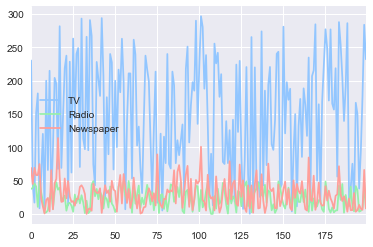

In [8]:
#Plotting the graph we see that there has been high variability over time in how this company has spent its advertising budget
df[['TV','Radio','Newspaper']].plot()

In [9]:
#General look at the ddbb
df.describe()

,TV,Radio,Newspaper,Sales
count,2,2,2,2
mean,147.0425,23.479,30.554,14.0225
std,85.854236,14.819546,21.778621,5.217457
min,0.7,0.3,0.3,1.6
25%,74.375,10.075,12.75,10.375
50%,149.75,23.45,25.75,12.9
75%,218.825,36.65,45.1,17.4
max,296.4,49.6,114,27


In [10]:
#What types of values do we have? All floats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [11]:
#Extra verification: how big is the database? 
df.shape

(200, 4)

In [12]:
#Now we create another column showing the combined result of the three promotional channels against sales of the product
df['TOTAL Advertising SPENT'] = df['TV'] + df['Radio'] + df['Newspaper']
df.head()

,TV,Radio,Newspaper,Sales,TOTAL Advertising SPENT
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,25


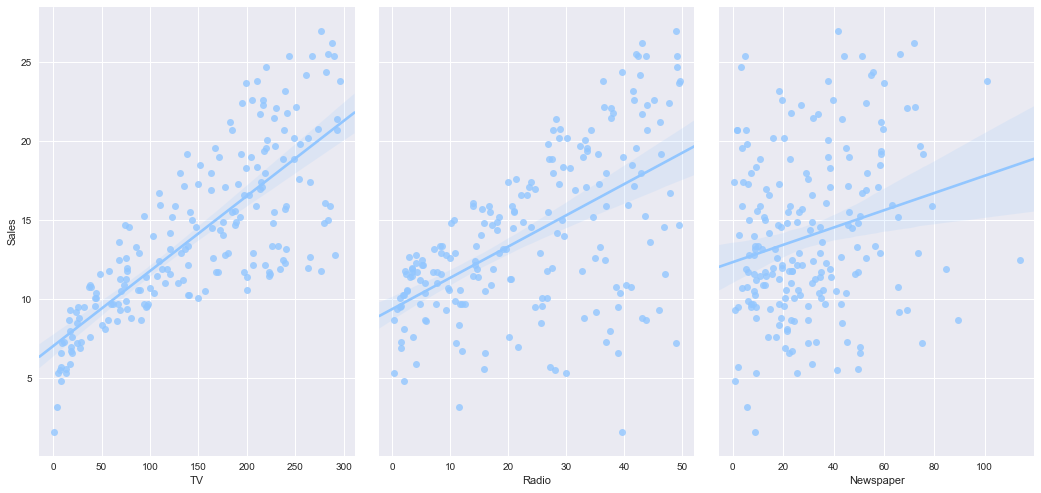

In [33]:
#Checking the linear regression for each one of our advertising channels
#We can see that the TV platform is the one that historically has been more in line with spending. But has it been profitable?
import seaborn as sns
sns.pairplot(df, x_vars = ['TV','Radio','Newspaper'], y_vars = 'Sales', size = 7, aspect = 0.7, kind = 'reg')

In [14]:
#Now we create another column showing the combined result of the three promotional channels against sales of the product
df['TV % of Total Advertising'] = (df['TV'] *100)/df['TOTAL Advertising SPENT']
df['Radio % of Total Advertising'] = (df['Radio'] *100)/df['TOTAL Advertising SPENT']
df['Newspaper % of Total Advertising'] = (df['Newspaper'] *100)/df['TOTAL Advertising SPENT']
df.head()

,TV,Radio,Newspaper,Sales,TOTAL Advertising SPENT,TV % of Total Advertising,Radio % of Total Advertising,Newspaper % of Total Advertising
0,230.1,37.8,69.2,22.1,337.1,68.258677,11.21329,20.528033
1,44.5,39.3,45.1,10.4,128.9,34.522886,30.488751,34.988363
2,17.2,45.9,69.3,9.3,132.4,12.990937,34.667674,52.34139
3,151.5,41.3,58.5,18.5,251.3,60.28651,16.43454,23.278949
4,180.8,10.8,58.4,12.9,25,72.32,4.32,23.36


In [15]:
#Now we create another column showing the ROI of the three promotional channels
df['TV ROI in sales'] = (df['TV'] * df['TV % of Total Advertising'])/100
df['Radio ROI in sales'] = (df['Radio'] * df['Radio % of Total Advertising'])/100
df['Newspaper ROI in sales'] = (df['Newspaper'] * df['Newspaper % of Total Advertising'])/100
df.head()

,TV,Radio,Newspaper,Sales,TOTAL Advertising SPENT,TV % of Total Advertising,Radio % of Total Advertising,Newspaper % of Total Advertising,TV ROI in sales,Radio ROI in sales,Newspaper ROI in sales
0,230.1,37.8,69.2,22.1,337.1,68.258677,11.21329,20.528033,157.063216,4.238624,14.205399
1,44.5,39.3,45.1,10.4,128.9,34.522886,30.488751,34.988363,15.362684,11.982079,15.779752
2,17.2,45.9,69.3,9.3,132.4,12.990937,34.667674,52.34139,2.234441,15.912462,36.272583
3,151.5,41.3,58.5,18.5,251.3,60.28651,16.43454,23.278949,91.334063,6.787465,13.618185
4,180.8,10.8,58.4,12.9,25,72.32,4.32,23.36,130.75456,0.46656,13.64224


In [16]:
df['Total $ acquired by TV'] = (df['Sales'] * df['TV % of Total Advertising'])/100
df['Total $ acquired by Radio'] = (df['Sales'] * df['Radio % of Total Advertising'])/100
df['Total $ acquired by Newspaper'] = (df['Sales'] * df['Newspaper % of Total Advertising'])/100
df.head()


,TV,Radio,Newspaper,Sales,TOTAL Advertising SPENT,TV % of Total Advertising,Radio % of Total Advertising,Newspaper % of Total Advertising,TV ROI in sales,Radio ROI in sales,Newspaper ROI in sales,Total $ acquired by TV,Total $ acquired by Radio,Total $ acquired by Newspaper
0,230.1,37.8,69.2,22.1,337.1,68.258677,11.21329,20.528033,157.063216,4.238624,14.205399,15.085168,2.478137,4.536695
1,44.5,39.3,45.1,10.4,128.9,34.522886,30.488751,34.988363,15.362684,11.982079,15.779752,3.59038,3.17083,3.63879
2,17.2,45.9,69.3,9.3,132.4,12.990937,34.667674,52.34139,2.234441,15.912462,36.272583,1.208157,3.224094,4.867749
3,151.5,41.3,58.5,18.5,251.3,60.28651,16.43454,23.278949,91.334063,6.787465,13.618185,11.153004,3.04039,4.306606
4,180.8,10.8,58.4,12.9,25,72.32,4.32,23.36,130.75456,0.46656,13.64224,9.32928,0.55728,3.01344


In [17]:
df['TV ROI in $'] = df['Total $ acquired by TV'] - df['TV']
df['Radio ROI in $'] = df['Total $ acquired by Radio'] - df['Radio']
df['Newspaper ROI in $'] = df['Total $ acquired by Newspaper'] - df['Newspaper']
df.head()

,TV,Radio,Newspaper,Sales,TOTAL Advertising SPENT,TV % of Total Advertising,Radio % of Total Advertising,Newspaper % of Total Advertising,TV ROI in sales,Radio ROI in sales,Newspaper ROI in sales,Total $ acquired by TV,Total $ acquired by Radio,Total $ acquired by Newspaper,TV ROI in $,Radio ROI in $,Newspaper ROI in $
0,230.1,37.8,69.2,22.1,337.1,68.258677,11.21329,20.528033,157.063216,4.238624,14.205399,15.085168,2.478137,4.536695,-215.014832,-35.321863,-64.663305
1,44.5,39.3,45.1,10.4,128.9,34.522886,30.488751,34.988363,15.362684,11.982079,15.779752,3.59038,3.17083,3.63879,-40.90962,-36.12917,-41.46121
2,17.2,45.9,69.3,9.3,132.4,12.990937,34.667674,52.34139,2.234441,15.912462,36.272583,1.208157,3.224094,4.867749,-15.991843,-42.675906,-64.432251
3,151.5,41.3,58.5,18.5,251.3,60.28651,16.43454,23.278949,91.334063,6.787465,13.618185,11.153004,3.04039,4.306606,-140.346996,-38.25961,-54.193394
4,180.8,10.8,58.4,12.9,25,72.32,4.32,23.36,130.75456,0.46656,13.64224,9.32928,0.55728,3.01344,-171.47072,-10.24272,-55.38656


# How much variability is there on each channel? Is there one channel that is more consistent than the others?

In [18]:
#From this we learn that our spending on Newspaper advertising produces highly unpredictable results
print(df['TV ROI in $'].std())
print(df['Radio ROI in $'].std())
print(df['Newspaper ROI in $'].std())

81.3393606249
13.6581127501
20.4789132588


In [19]:
#What has been the max ROI for each channel?
print(df['TV ROI in $'].max())
print(df['Radio ROI in $'].max())
print(df['Newspaper ROI in $'].max())

-0.677142857143
-0.277085162423
-0.281741867786


In [20]:
#In order to have a better view of the data, we transpose the columns. Now we see records more easily, from left to right
df.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
TV,230.1,44.5,17.2,151.5,180.8,8.7,57.5,120.2,8.6,199.8,...,39.5,75.5,17.2,166.8,149.7,38.2,94.2,177,283.6,232.1
Radio,37.8,39.3,45.9,41.3,10.8,48.9,32.8,19.6,2.1,2.6,...,41.1,10.8,4.1,42,35.6,3.7,4.9,9.3,42,8.6
Newspaper,69.2,45.1,69.3,58.5,58.4,75,23.5,11.6,1,21.2,...,5.8,6,31.6,3.6,6,13.8,8.1,6.4,66.2,8.7
Sales,22.1,10.4,9.3,18.5,12.9,7.2,11.8,13.2,4.8,10.6,...,10.8,9.9,5.9,19.6,17.3,7.6,9.7,12.8,25.5,13.4
TOTAL Advertising SPENT,337.1,128.9,132.4,251.3,25,132.6,113.8,151.4,11.7,223.6,...,86.4,92.3,52.9,212.4,191.3,55.7,107.2,192.7,391.8,249.4
TV % of Total Advertising,68.258677,34.522886,12.990937,60.28651,72.32,6.561086,50.527241,79.392338,73.504274,89.355993,...,45.717593,81.798483,32.514178,78.531073,78.254051,68.581688,87.873134,91.852621,72.383869,93.063352
Radio % of Total Advertising,11.21329,30.488751,34.667674,16.43454,4.32,36.877828,28.822496,12.945839,17.948718,1.162791,...,47.569444,11.700975,7.750473,19.774011,18.609514,6.642729,4.570896,4.826155,10.719755,3.448276
Newspaper % of Total Advertising,20.528033,34.988363,52.34139,23.278949,23.36,56.561086,20.650264,7.661823,8.547009,9.481216,...,6.712963,6.500542,59.73535,1.694915,3.136435,24.775583,7.55597,3.321225,16.896376,3.488372
TV ROI in sales,157.063216,15.362684,2.234441,91.334063,130.75456,0.570814,29.053163,95.42959,6.321368,178.533274,...,18.058449,61.757855,5.592439,130.989831,117.146315,26.198205,82.776493,162.579139,205.280653,216.00004
Radio ROI in sales,4.238624,11.982079,15.912462,6.787465,0.46656,18.033258,9.453779,2.537384,0.376923,0.030233,...,19.551042,1.263705,0.317769,8.305085,6.624987,0.245781,0.223974,0.448832,4.502297,0.296552


# We now plot the graph profile for ROI on each channel, noticing that each channel has peaked at different moments in time

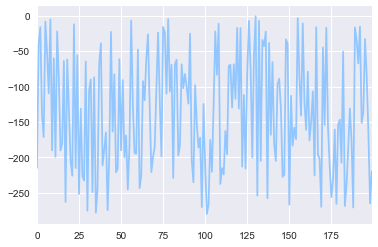

In [21]:
df['TV ROI in $'].plot()

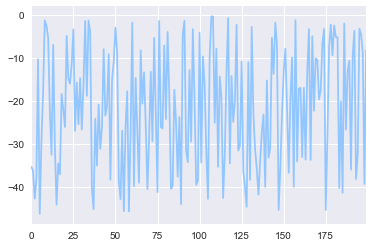

In [22]:
#As we can see above, TV is the least profitable channel, with radio closely following 
df['Radio ROI in $'].plot()

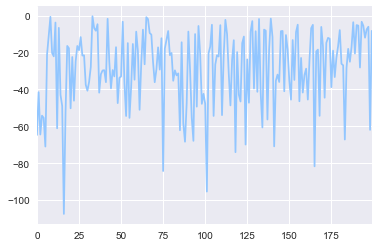

In [23]:
#Although fairly inconsistent, newspaper advertising has the potential to produce a very strong uptick in sales
df['Newspaper ROI in $'].plot()

In [24]:
#now colouring the cells...we see plenty of negative values...
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

colored = df.style.applymap(color_negative_red)
colored

# By plotting the three graphs overlapping each other, below, we notice that none of the channels have been profitable

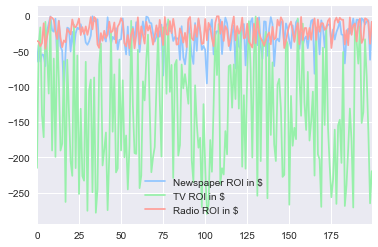

In [25]:
df[['Newspaper ROI in $','TV ROI in $','Radio ROI in $']].plot()

# What channel has achieved the highest number of positive ROI values over time?

In [26]:
#Evaluating ROI we see that Newspaper ROI has been way higher than TV ROI, over time (pending investigation of inf value)
print(df['TV ROI in $'].max())
print(df['Radio ROI in $'].max())
print(df['Newspaper ROI in $'].max())

-0.677142857143
-0.277085162423
-0.281741867786


In [27]:
#Now we investigage whether there is any correlation between $ spent on each channel and sales
#Correlations are not particularly high between sales and ROI on each channel
cor_radio = df[['Radio','Radio ROI in $']].corr('pearson')
cor_tv = df[['TV','TV ROI in $']].corr('pearson')
cor_newspaper = df[['Newspaper','Newspaper ROI in $']].corr('pearson')
print(cor_radio)
print(cor_tv)
print(cor_newspaper)

                   Radio  Radio ROI in $
Radio                  1       -0.999305
Radio ROI in $ -0.999305               1
                   TV  TV ROI in $
TV                  1    -0.999689
TV ROI in $ -0.999689            1
                    Newspaper  Newspaper ROI in $
Newspaper                   1            -0.99967
Newspaper ROI in $   -0.99967                   1


In [28]:
#For further verification, next we have a clearer view of the correlations, using "describe". 
#As we see in the "mean" column, correlations are not particularly high between sales and SPENDING on each channel
df[['TV','Radio','Newspaper','Sales']].corr('pearson').describe()

,TV,Radio,Newspaper,Sales
count,4,4,4,4
mean,0.470607,0.486676,0.406351,0.643303
std,0.493658,0.402911,0.412616,0.329271
min,0.043558,0.043558,0.056648,0.228299
25%,0.053375,0.266233,0.185386,0.479091
50%,0.419436,0.451573,0.284379,0.672456
75%,0.836668,0.672016,0.505344,0.836668
max,1,1,1,1


In [29]:
#Finally we see what we have in the end
df.describe(include = 'all')

,TV,Radio,Newspaper,Sales,TOTAL Advertising SPENT,TV % of Total Advertising,Radio % of Total Advertising,Newspaper % of Total Advertising,TV ROI in sales,Radio ROI in sales,Newspaper ROI in sales,Total $ acquired by TV,Total $ acquired by Radio,Total $ acquired by Newspaper,TV ROI in $,Radio ROI in $,Newspaper ROI in $
count,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
mean,147.0425,23.479,30.554,14.0225,201.0755,67.663794,14.477246,17.858959,113.448274,4.465185,7.301703,10.001324,1.838053,2.183123,-137.041176,-21.640947,-28.370877
std,85.854236,14.819546,21.778621,5.217457,92.775643,21.728212,13.241199,14.109358,76.390764,5.196868,9.221155,4.973371,1.27684,1.408263,81.339361,13.658113,20.478913
min,0.7,0.3,0.3,1.6,11.7,1.428571,0.263389,0.104932,0.01,0.00079,0.000315,0.022857,0.022915,0.018258,-280.130812,-46.244796,-107.475275
25%,74.375,10.075,12.75,10.375,124.875,58.579719,6.175876,7.284206,42.662909,0.566394,0.9802,6.47975,0.714693,0.989454,-205.280824,-33.996914,-41.516483
50%,149.75,23.45,25.75,12.9,207.35,72.956859,10.75962,14.493599,116.692251,2.630073,4.294979,10.444951,1.711504,2.047267,-138.254522,-21.345746,-23.90637
75%,218.825,36.65,45.1,17.4,281.125,84.121115,18.138617,23.443188,175.885956,6.546377,9.993741,13.585006,2.782832,3.25618,-66.965209,-9.552284,-11.567659
max,296.4,49.6,114,27,433.6,95.845697,80.816327,65.473146,278.623442,32.003265,59.505495,21.473741,5.252408,6.524725,-0.677143,-0.277085,-0.281742


In [30]:
#Let's now create a column to evaluate our sales against our advertising expenditure
df['Total Advertising ROI'] = df['Sales'] - df['TOTAL Advertising SPENT']
df.head()

,TV,Radio,Newspaper,Sales,TOTAL Advertising SPENT,TV % of Total Advertising,Radio % of Total Advertising,Newspaper % of Total Advertising,TV ROI in sales,Radio ROI in sales,Newspaper ROI in sales,Total $ acquired by TV,Total $ acquired by Radio,Total $ acquired by Newspaper,TV ROI in $,Radio ROI in $,Newspaper ROI in $,Total Advertising ROI
0,230.1,37.8,69.2,22.1,337.1,68.258677,11.21329,20.528033,157.063216,4.238624,14.205399,15.085168,2.478137,4.536695,-215.014832,-35.321863,-64.663305,-315
1,44.5,39.3,45.1,10.4,128.9,34.522886,30.488751,34.988363,15.362684,11.982079,15.779752,3.59038,3.17083,3.63879,-40.90962,-36.12917,-41.46121,-118.5
2,17.2,45.9,69.3,9.3,132.4,12.990937,34.667674,52.34139,2.234441,15.912462,36.272583,1.208157,3.224094,4.867749,-15.991843,-42.675906,-64.432251,-123.1
3,151.5,41.3,58.5,18.5,251.3,60.28651,16.43454,23.278949,91.334063,6.787465,13.618185,11.153004,3.04039,4.306606,-140.346996,-38.25961,-54.193394,-232.8
4,180.8,10.8,58.4,12.9,25,72.32,4.32,23.36,130.75456,0.46656,13.64224,9.32928,0.55728,3.01344,-171.47072,-10.24272,-55.38656,-237.1


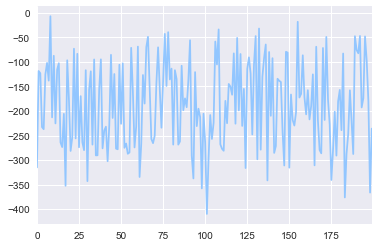

In [31]:
#As we can see in the graph below, the advertising efforts of this company have never been profitable
df['Total Advertising ROI'].plot()

# Total losses for the marketing campaign analyzed in this exercise...

In [32]:
#Total losses for the marketing campaign analyzed in this exercise: $37.410,59
df['Total Advertising ROI'].sum()

-37410.599999999984